In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS


# Supermart Grocery Sales - Retail Analytics Dataset

In [2]:
ss=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Supermart Grocery Sales - Retail Analytics Dataset.csv")
ss.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu


# Data description

In [3]:
ss.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [4]:
525.627+(1.5*345.6)

1044.027

In [5]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
ss.duplicated().sum()
ss.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

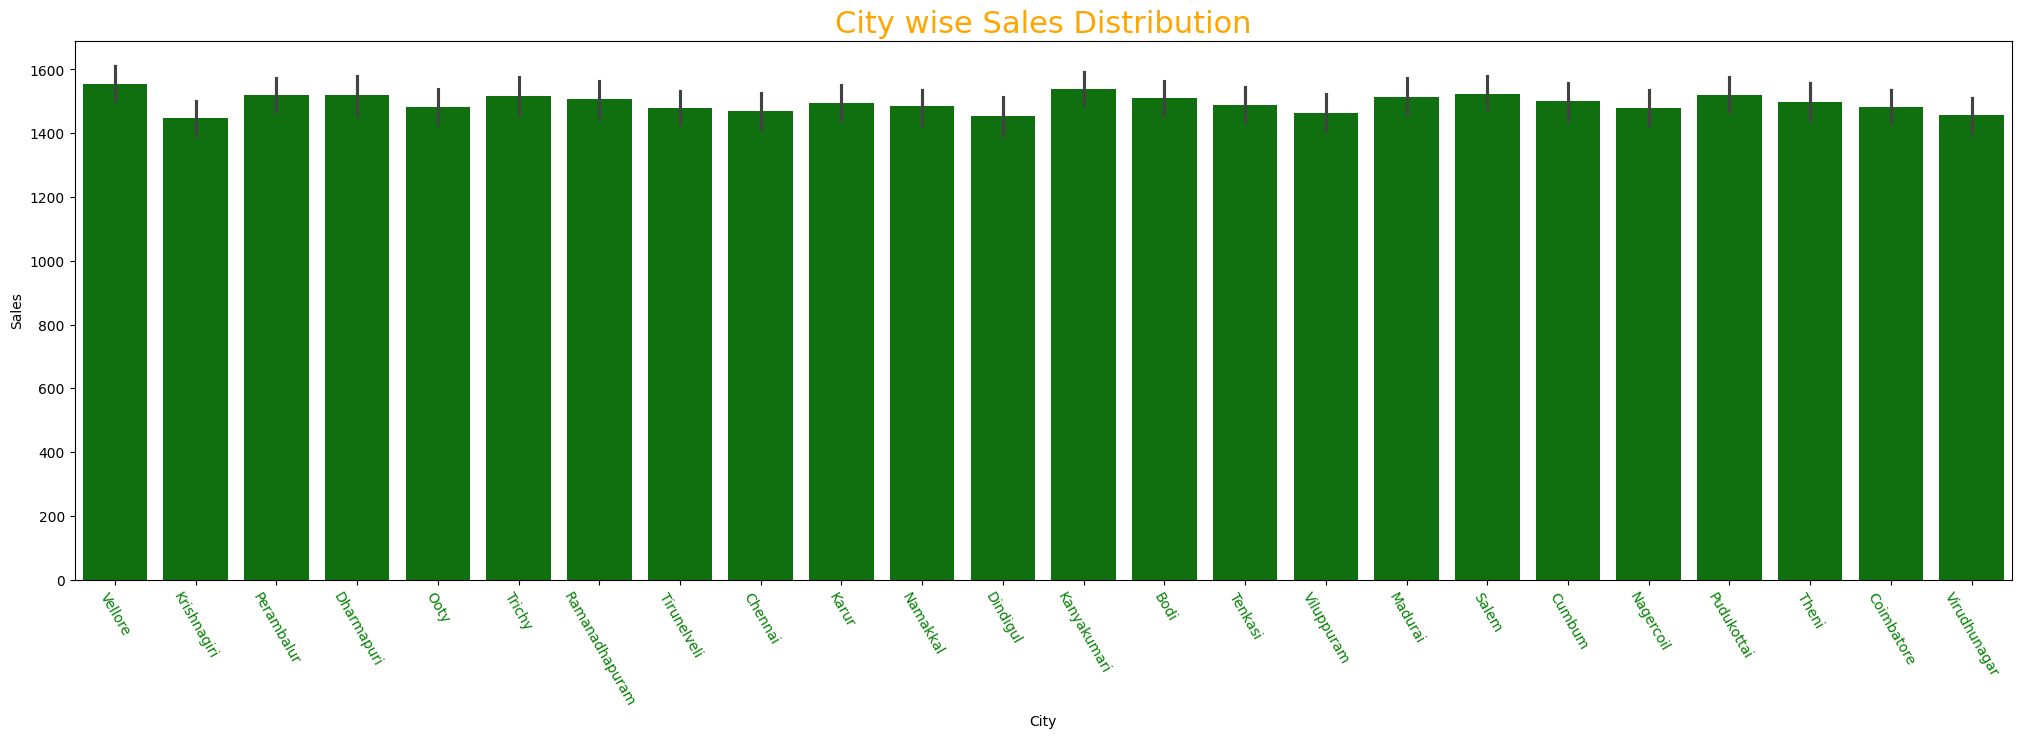

In [7]:
plt.figure(figsize=(25,7))
sns.barplot(data=ss,y="Sales",x="City",color="green")
plt.xticks(rotation=300, horizontalalignment="center",color="green")
plt.title("City wise Sales Distribution",fontsize=22,color="orange")

plt.show()

### Observation

 - There are 24 city preasenting average sales distribution in bargraph.
 - Highest sales in vellore and slightly lowest sales in Krishnagiri.

Text(0.5, 1.0, 'Relation Between Sales and Profit')

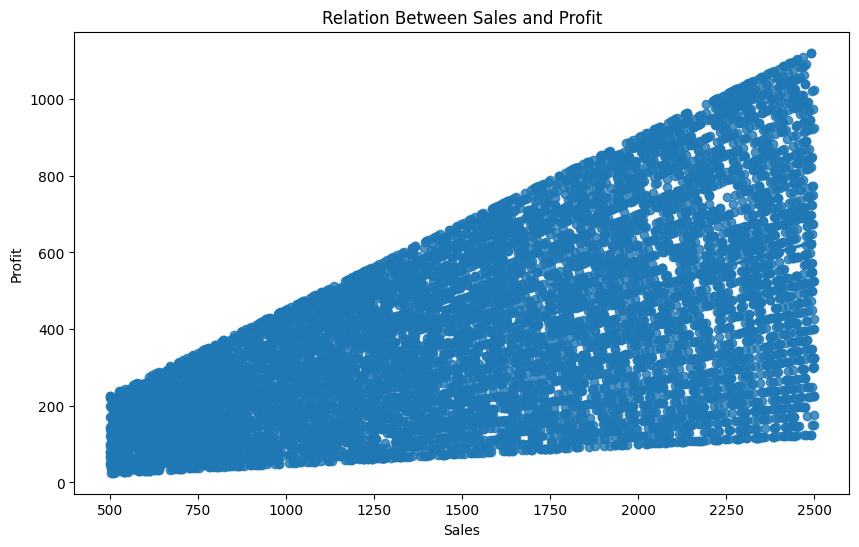

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(data=ss,x="Sales",y="Profit" )
plt.title("Relation Between Sales and Profit") 

### Observation
##### * We are showing here sales and profit relation .
##### * here we can see a positive relation between sales and profit.

Text(0.5, 1.0, 'Region wise Distribution')

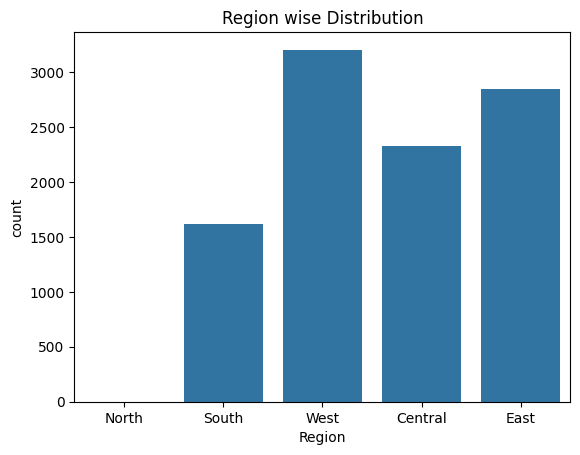

In [9]:
sns.countplot(data=ss,x="Region")
plt.title("Region wise Distribution")

### Observation
##### * Highest orders came from West Region.
##### * Lowest Orders came from North Region.

             Category        Sub Category  Sales
0              Bakery            Biscuits    459
1              Bakery       Breads & Buns    502
2              Bakery               Cakes    452
3           Beverages       Health Drinks    719
4           Beverages         Soft Drinks    681
5   Eggs, Meat & Fish             Chicken    348
6   Eggs, Meat & Fish                Eggs    379
7   Eggs, Meat & Fish                Fish    369
8   Eggs, Meat & Fish              Mutton    394
9         Food Grains        Atta & Flour    353
10        Food Grains       Dals & Pulses    343
11        Food Grains     Organic Staples    372
12        Food Grains                Rice    330
13   Fruits & Veggies        Fresh Fruits    369
14   Fruits & Veggies    Fresh Vegetables    354
15   Fruits & Veggies      Organic Fruits    348
16   Fruits & Veggies  Organic Vegetables    347
17       Oil & Masala   Edible Oil & Ghee    451
18       Oil & Masala             Masalas    463
19       Oil & Masal

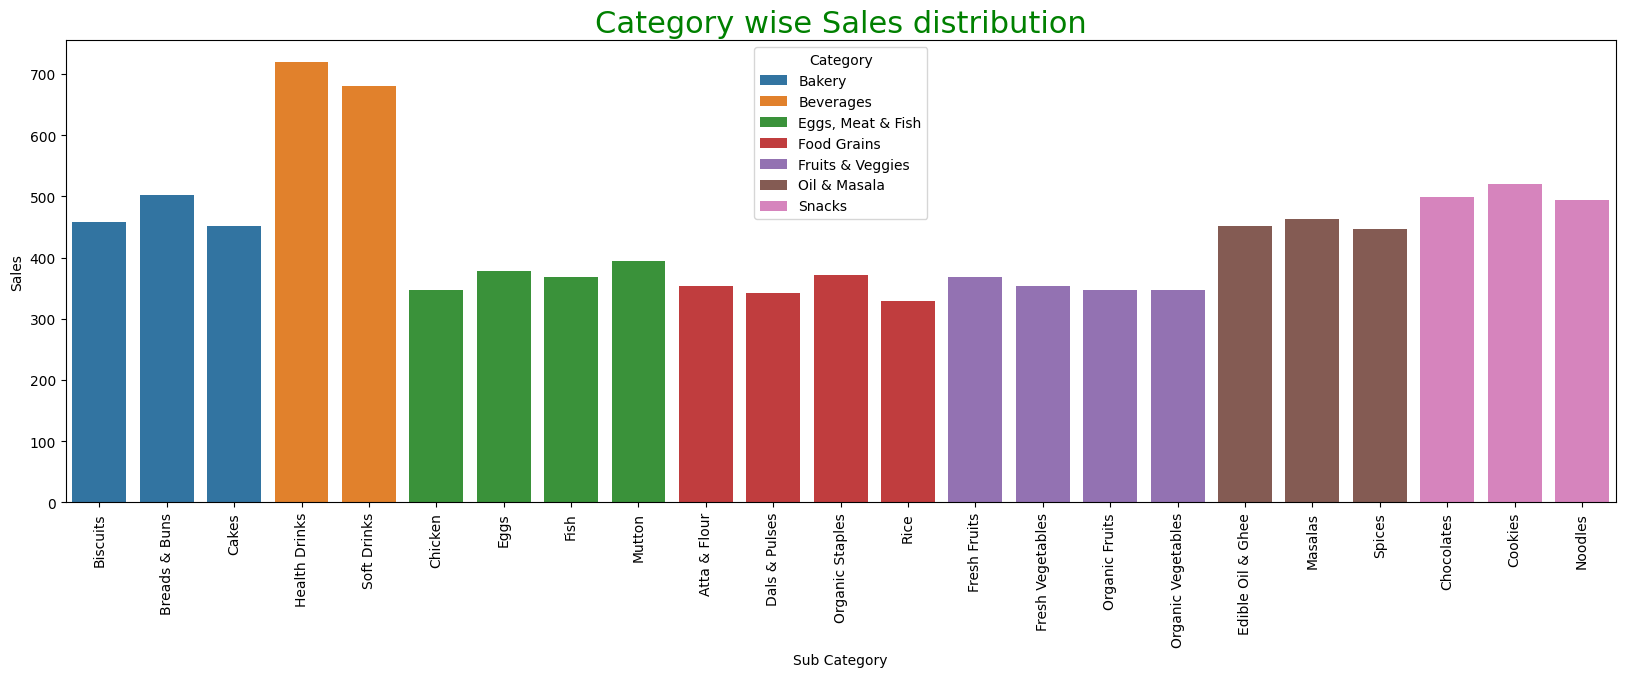

In [10]:
plt.figure(figsize=(20,6))
p=ss.groupby(["Category","Sub Category"])["Sales"].count().reset_index()
print(p)
sns.barplot(data=p,x="Sub Category",y="Sales",hue="Category")
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Category wise Sales distribution",fontsize=22,color="green")
plt.show()


### Observation
##### * Top sales Category is Beverages.
##### * Highest sales product subcategory is Health Drinks and second highest is Soft Drinks.
##### * lowest sales category is Food Grains.
##### * Lowest sales subcategory products is Rice.


# Date related Analysis

In [11]:
ss["New_Date"]=pd.to_datetime(ss["Order Date"], dayfirst = bool)
ss.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,New_Date
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,2017-08-11
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017-08-11


In [12]:
ss["Month"]=ss["New_Date"].dt.month_name()
ss.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,New_Date,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,2017-08-11,August
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017-08-11,August


In [13]:
ss["Year"]=ss["New_Date"].dt.year
ss.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,New_Date,Month,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,2017-08-11,August,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017-08-11,August,2017


In [14]:
ss["Month_Num"] = ss["New_Date"].dt.month
ss.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,New_Date,Month,Year,Month_Num
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,2017-08-11,August,2017,8
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017-08-11,August,2017,8


In [15]:
ss.sort_values(["Year","Month_Num"], inplace=True)

In [16]:
ss["year_month"] = ss["Year"].astype("str") +", " +ss["Month"]
ss.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,New_Date,Month,Year,Month_Num,year_month
157,OD158,Komal,Oil & Masala,Edible Oil & Ghee,Salem,03-01-2015,West,1774,0.15,620.90,Tamil Nadu,2015-01-03,January,2015,1,"2015, January"
244,OD245,Roshan,Bakery,Biscuits,Coimbatore,06-01-2015,Central,817,0.15,326.80,Tamil Nadu,2015-01-06,January,2015,1,"2015, January"
245,OD246,Vinne,"Eggs, Meat & Fish",Fish,Kanyakumari,06-01-2015,Central,2462,0.31,369.30,Tamil Nadu,2015-01-06,January,2015,1,"2015, January"
246,OD247,Sudeep,Fruits & Veggies,Organic Fruits,Perambalur,06-01-2015,Central,962,0.21,288.60,Tamil Nadu,2015-01-06,January,2015,1,"2015, January"
247,OD248,Ridhesh,Beverages,Health Drinks,Cumbum,06-01-2015,Central,538,0.19,59.18,Tamil Nadu,2015-01-06,January,2015,1,"2015, January"


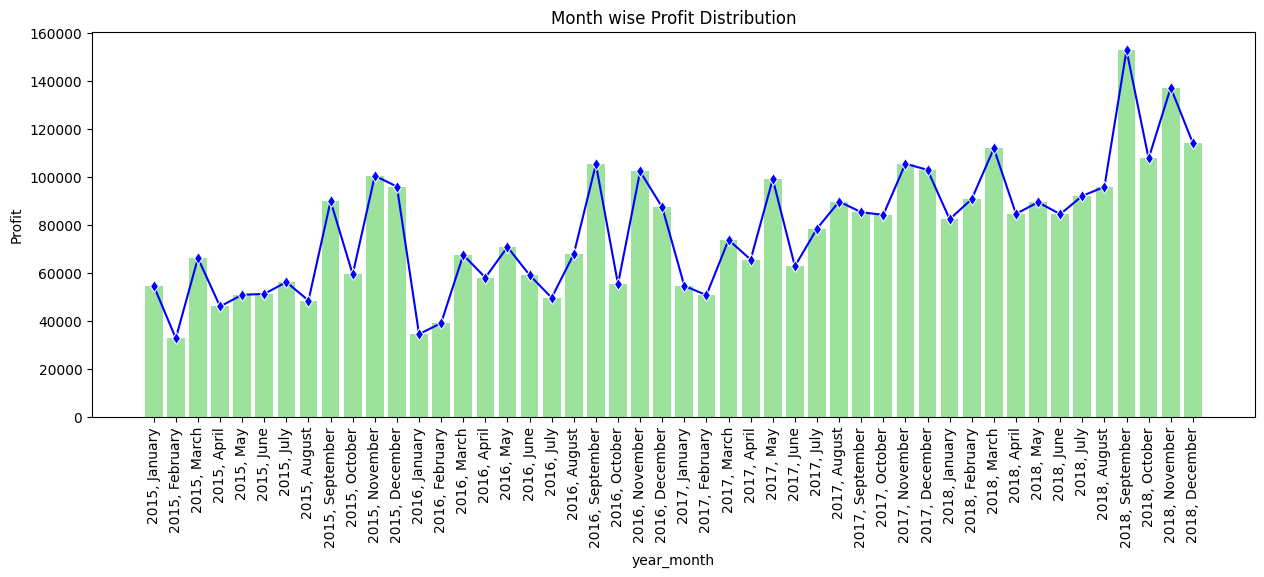

In [17]:
plt.figure(figsize=(15,5))
#sns.barplot(data=ss,x="Month",y="Profit",color="#993366")
a=ss.groupby(["Year", "year_month", "Month_Num"])["Profit"].sum().reset_index()
a.sort_values(["Year", "Month_Num"], inplace=True)

sns.barplot(data=a,x="year_month",y="Profit",color="lightgreen")
sns.lineplot(data=a,x="year_month",y="Profit",color="blue", marker="d")
plt.title("Month wise Profit Distribution")
plt.xticks(rotation=90)
plt.show()

# Observation
##### * Maximum profit comes from November it's 445766.59 .
##### * Minimum profit comes from February it's 213406.17 .

    Year       year_month  Month_Num   Sales
0   2015      2015, April          4  176187
1   2015     2015, August          8  211451
2   2015   2015, December         12  368532
3   2015   2015, February          2  120444
4   2015    2015, January          1  203014
5   2015       2015, July          7  229055
6   2015       2015, June          6  209191
7   2015      2015, March          3  260072
8   2015        2015, May          5  218740
9   2015   2015, November         11  396619
10  2015    2015, October         10  226102
11  2015  2015, September          9  356192
12  2016      2016, April          4  231694
13  2016     2016, August          8  266132
14  2016   2016, December         12  367865
15  2016   2016, February          2  148752
16  2016    2016, January          1  136079
17  2016       2016, July          7  194498
18  2016       2016, June          6  216643
19  2016      2016, March          3  242347
20  2016        2016, May          5  276958
21  2016  

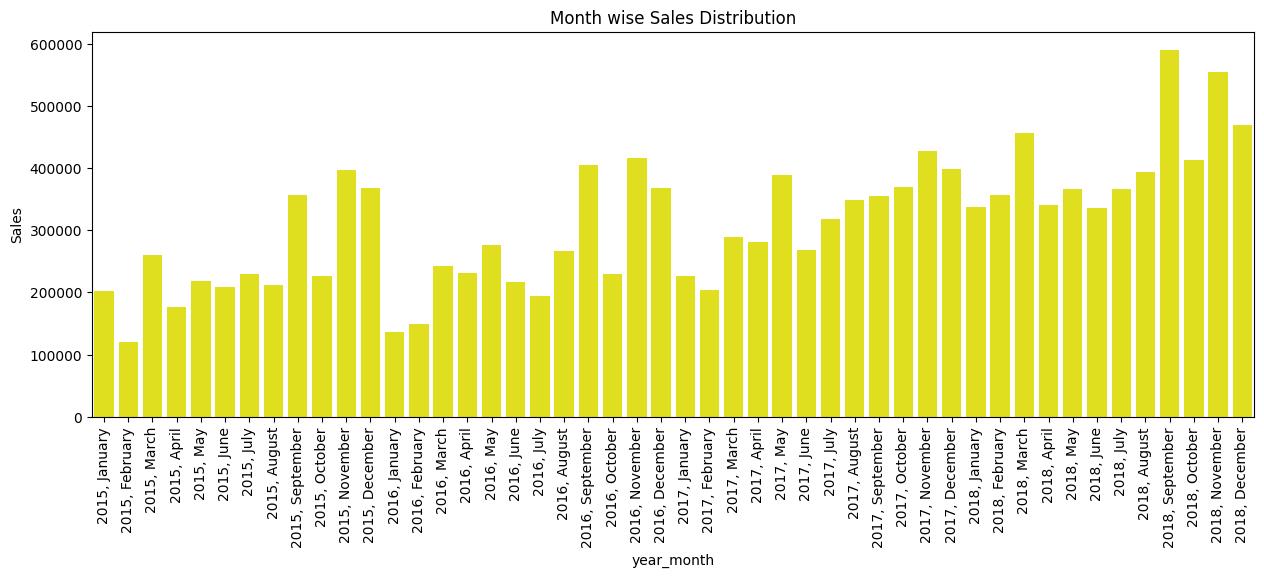

In [18]:
plt.figure(figsize=(15,5))
#sns.barplot(data=ss,x="Month",y="Sales")
#b=ss.groupby("Month")["Sales"].sum().reset_index()
b=ss.groupby(["Year", "year_month", "Month_Num"])["Sales"].sum().reset_index()

print(b)
b.sort_values(["Year","Month_Num"],inplace= True)
sns.barplot(data=b,x="year_month",y="Sales",color="yellow",)
plt.title("Month wise Sales Distribution")
plt.xticks(rotation=90)
plt.show()

# Observation
##### * Maximum profit comes from November it's 1794831 .
##### * Minimum profit comes from February it's 830301 .

   Year      Profit
0  2015   752529.11
1  2016   797192.99
2  2017   953216.22
3  2018  1244182.88


Text(0.5, 1.0, 'Yearly Profit Distribution')

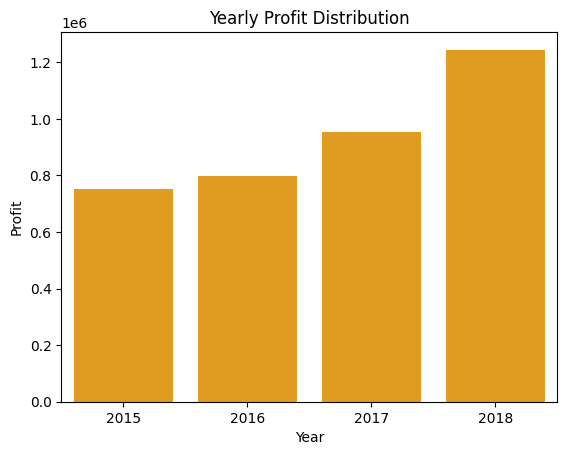

In [19]:
c=ss.groupby("Year")["Profit"].sum().reset_index()
print(c)
sns.barplot(data=c,x="Year",y="Profit",color="orange")
plt.title("Yearly Profit Distribution")

# Observation
##### * Maximum profit comes from 2018 it's 1244182.88 .
##### * Minimum profit comes from 2015 it's 752529.11 .

Text(0.5, 1.0, 'Sales Distribution ')

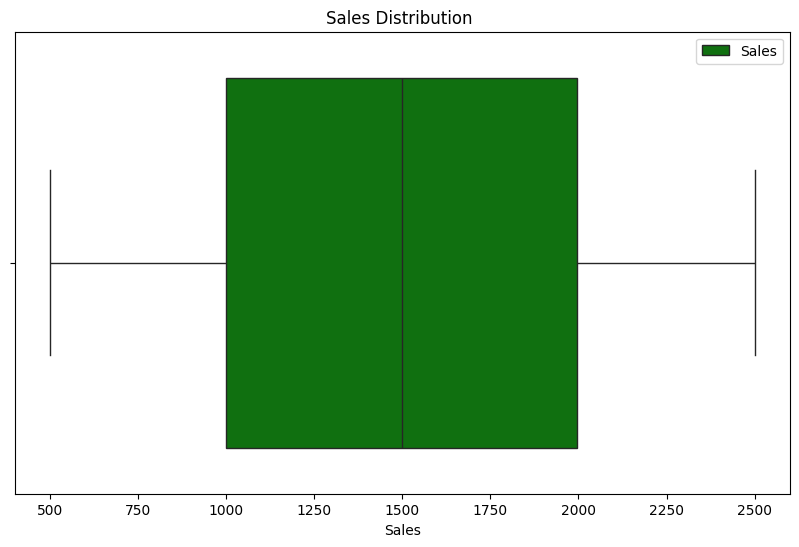

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ss,x="Sales",label=("Sales"),color="green")
plt.title("Sales Distribution ")

<Axes: xlabel='Sales', ylabel='Density'>

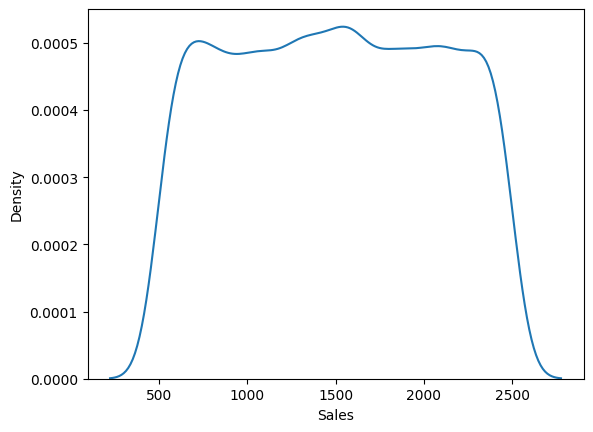

In [21]:
sns.kdeplot(data=ss,x="Sales")

# Observation
##### * 1496.59 is mean and 500.00 min, 2500.00 is max .
##### * We can see it's a Normal Distribution .

Text(0.5, 1.0, 'Profit Distribution')

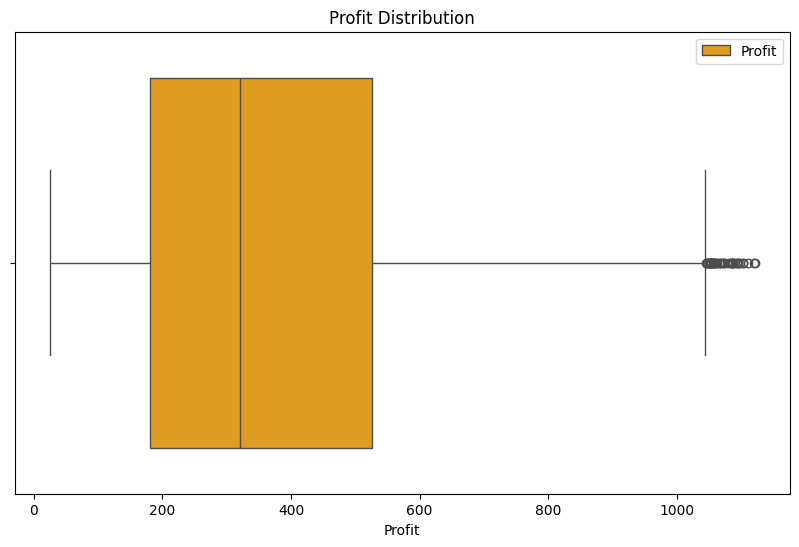

In [22]:

plt.figure(figsize=(10,6))
#sns.boxplot(data=ss,x="Sales",label=("Sales"))
sns.boxplot(data=ss,x="Profit",label=("Profit"),color="orange")
plt.title("Profit Distribution")


111

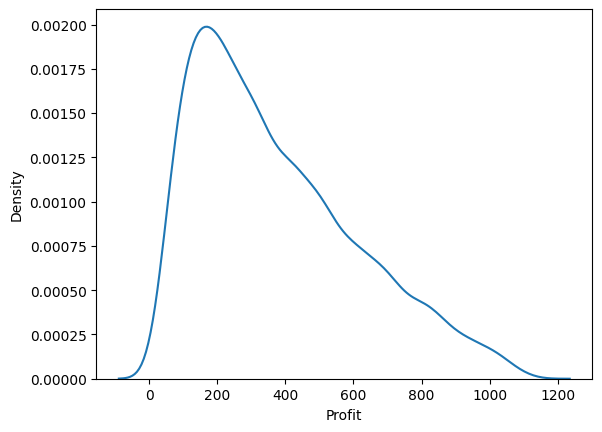

In [23]:
sns.kdeplot(data=ss,x="Profit")

sum(ss["Profit"]>1000)


# Observation
##### * Here 50% is 320.78   and  100% is 1120.95 .
##### * its a rightskewed distribution.
##### * Here we can see 1581 outlair after range 641.56 and 111 outlair after range 1000 .

In [24]:
ss.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,New_Date,Month,Year,Month_Num,year_month
157,OD158,Komal,Oil & Masala,Edible Oil & Ghee,Salem,03-01-2015,West,1774,0.15,620.9,Tamil Nadu,2015-01-03,January,2015,1,"2015, January"
244,OD245,Roshan,Bakery,Biscuits,Coimbatore,06-01-2015,Central,817,0.15,326.8,Tamil Nadu,2015-01-06,January,2015,1,"2015, January"


In [25]:
c=ss.loc[ss["Profit"]>1044.027,["Category","Sub Category"]]
unique_category=c["Category"].unique()
unique_category

array(['Fruits & Veggies', 'Beverages', 'Snacks', 'Bakery', 'Food Grains',
       'Oil & Masala', 'Eggs, Meat & Fish'], dtype=object)

In [26]:
d=ss.loc[ss["Profit"]>1044.027,["Category","Sub Category"]]
unique_sub_category=c["Sub Category"].unique()
unique_category

array(['Fruits & Veggies', 'Beverages', 'Snacks', 'Bakery', 'Food Grains',
       'Oil & Masala', 'Eggs, Meat & Fish'], dtype=object)

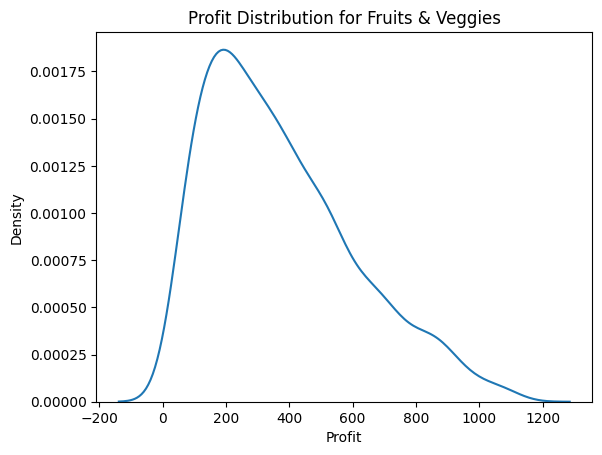

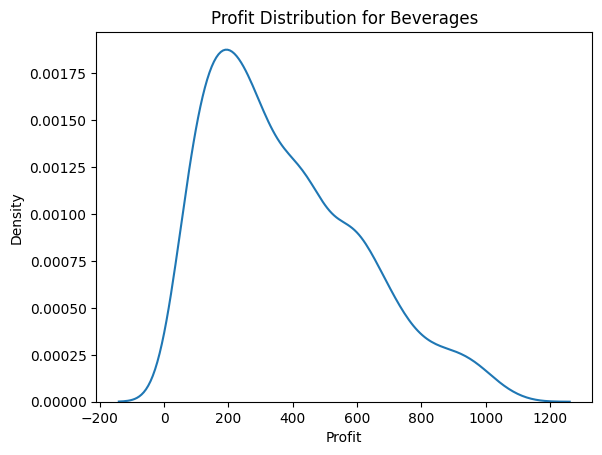

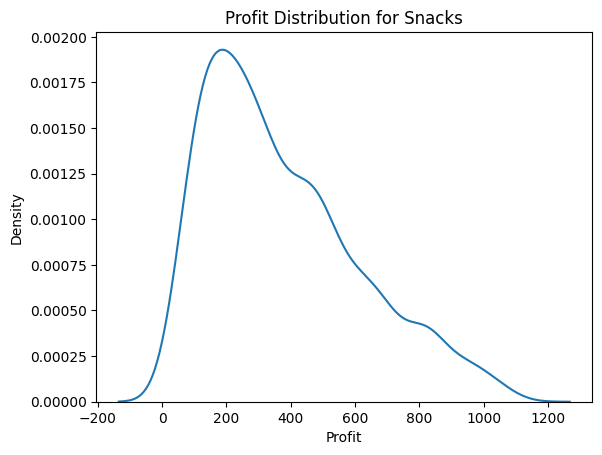

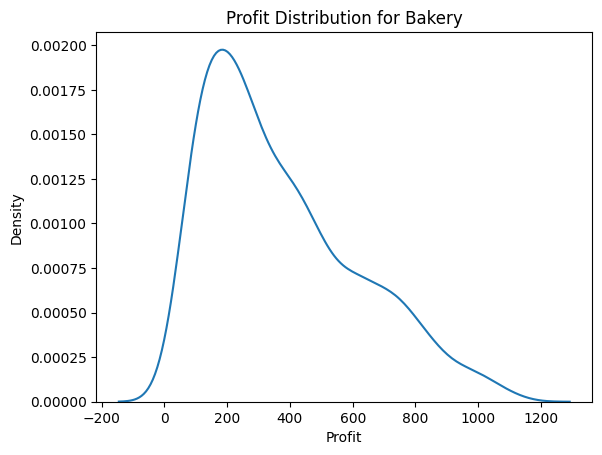

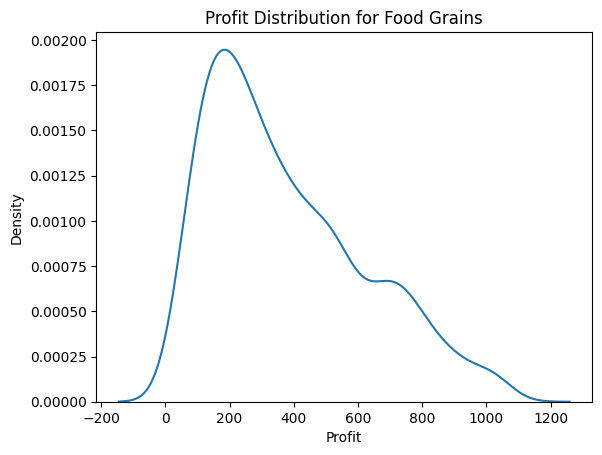

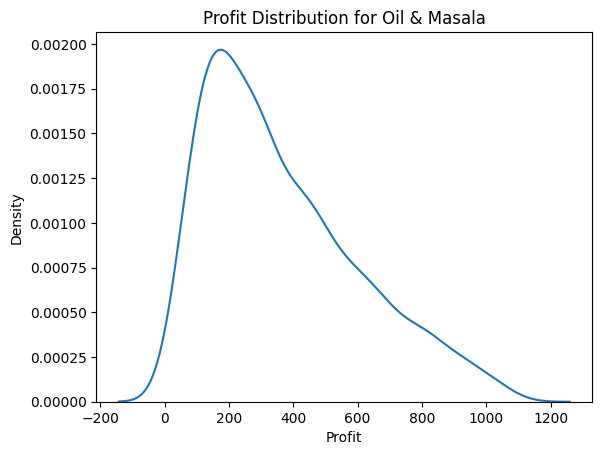

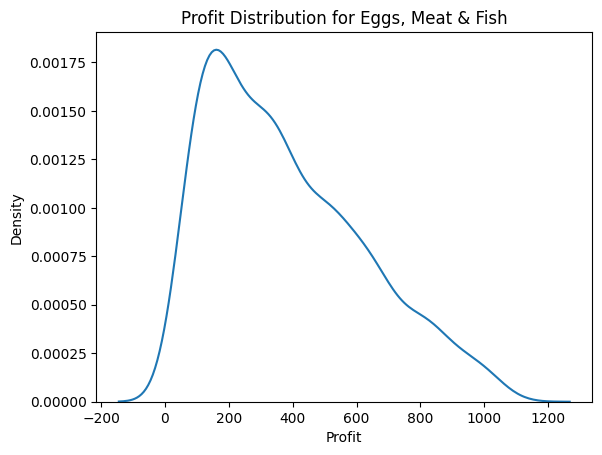

In [27]:
for i in unique_category:
    a = ss.loc[ss["Category"] == i]
    plt.figure()
    sns.kdeplot(data=a, x="Profit", warn_singular=False)
    plt.title(f"Profit Distribution for {i}")
    plt.show()

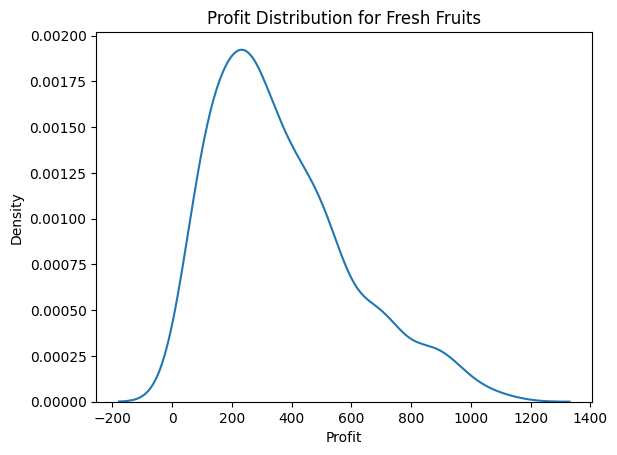

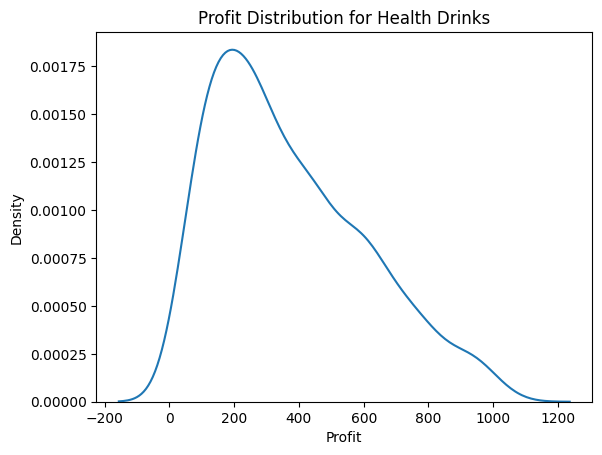

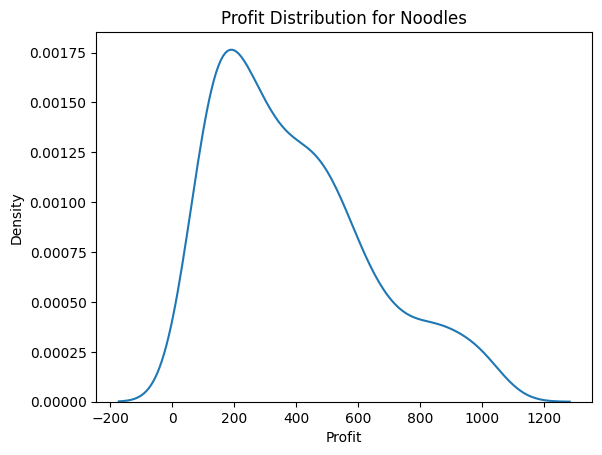

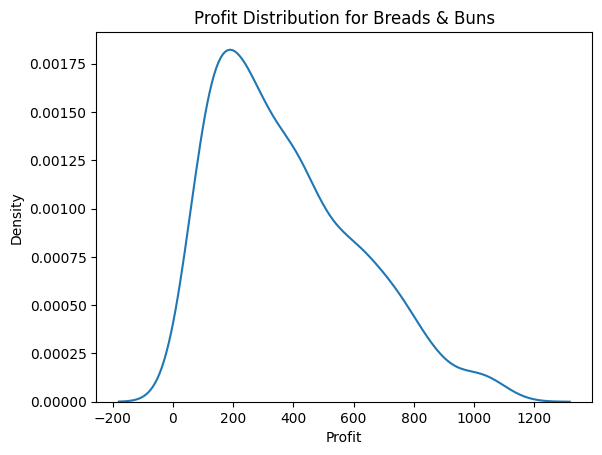

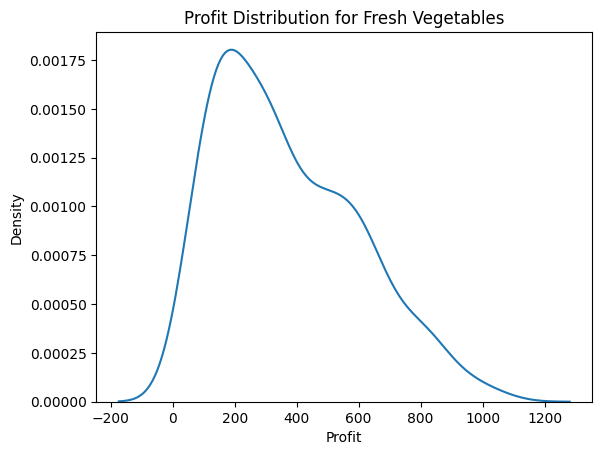

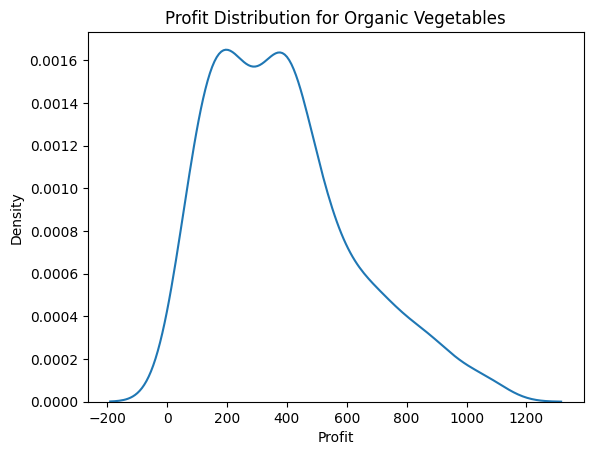

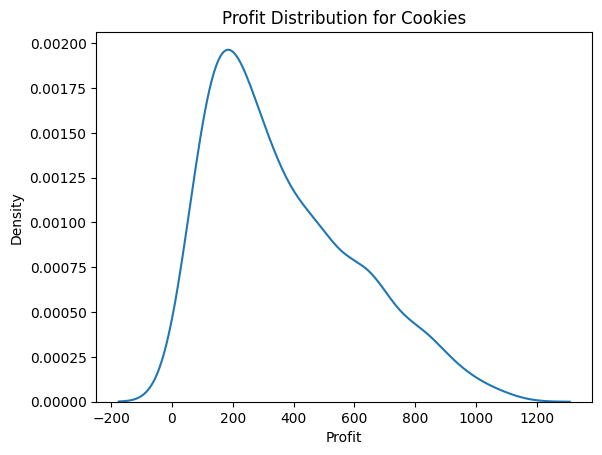

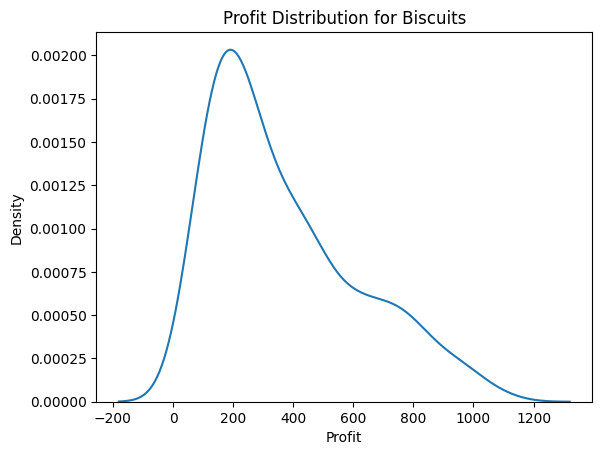

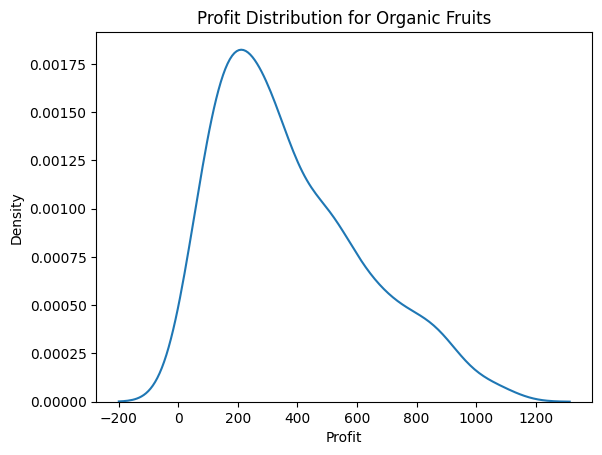

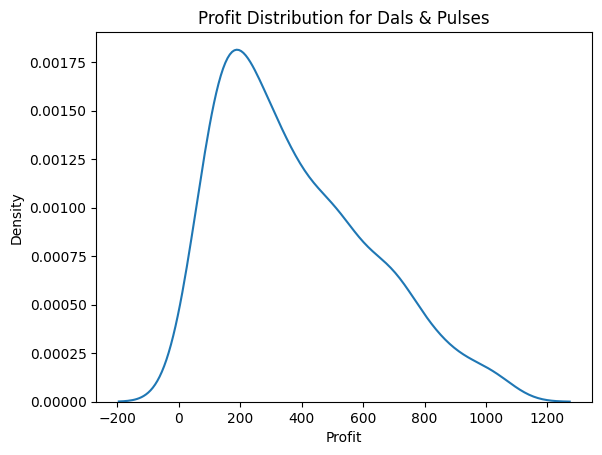

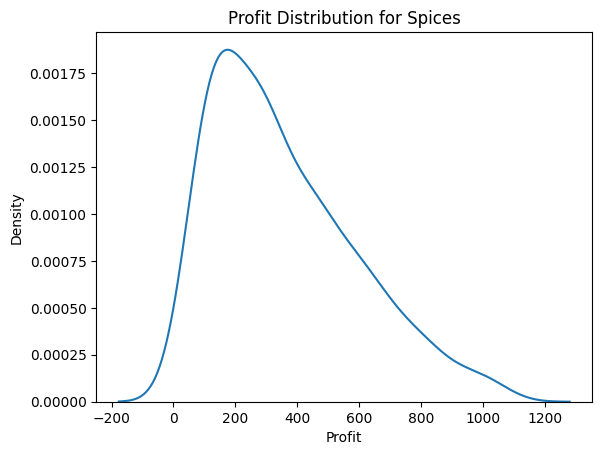

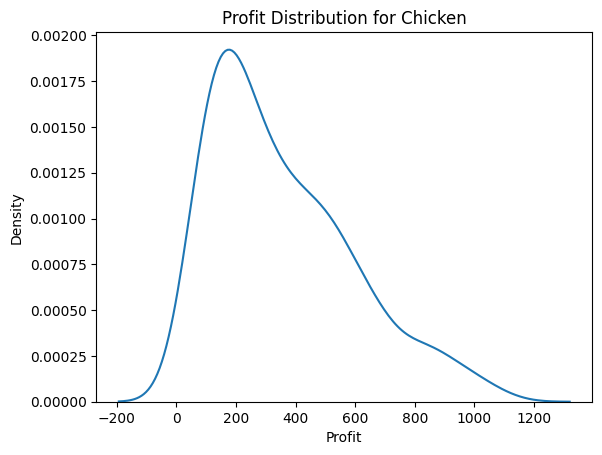

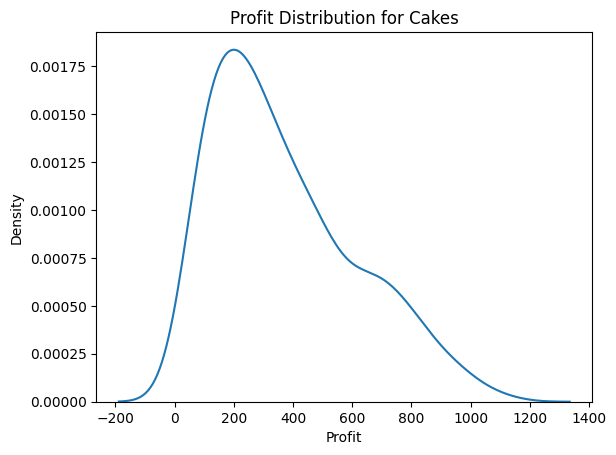

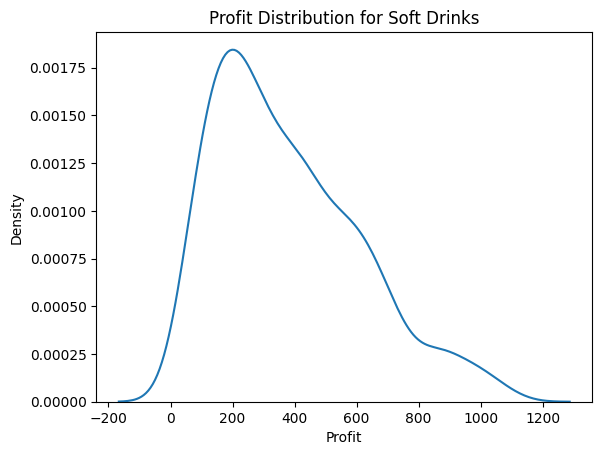

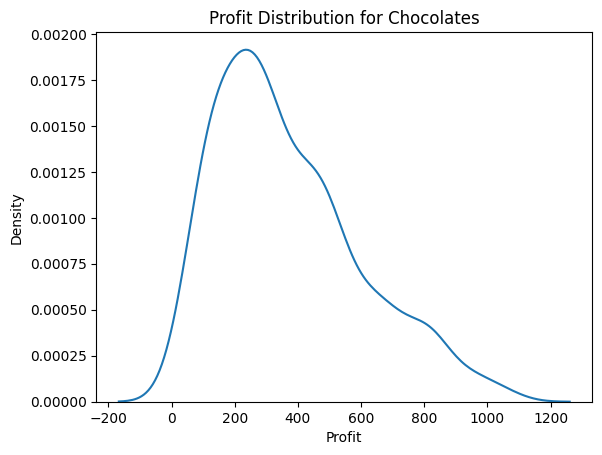

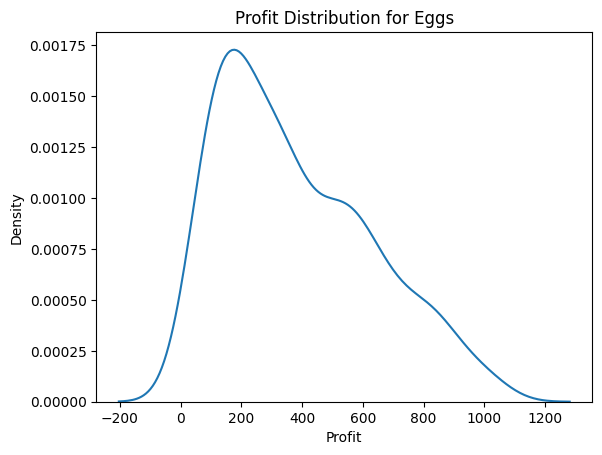

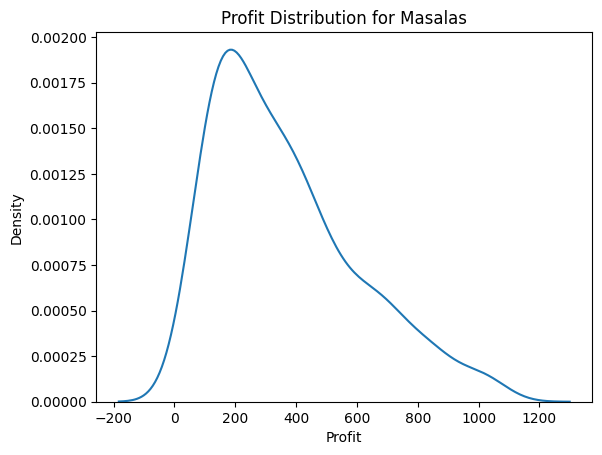

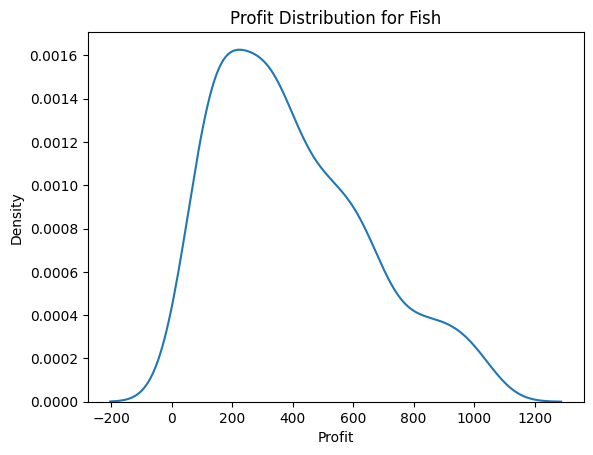

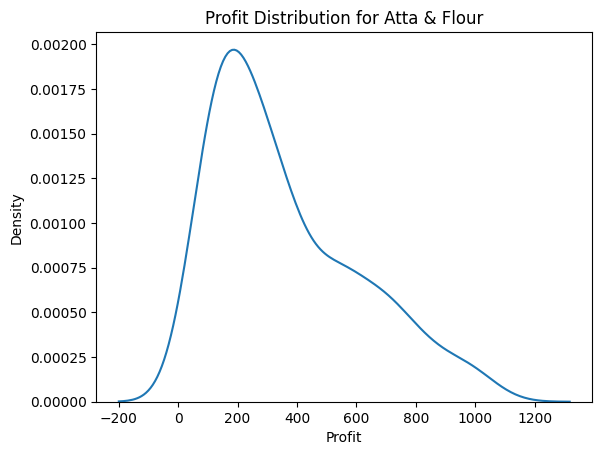

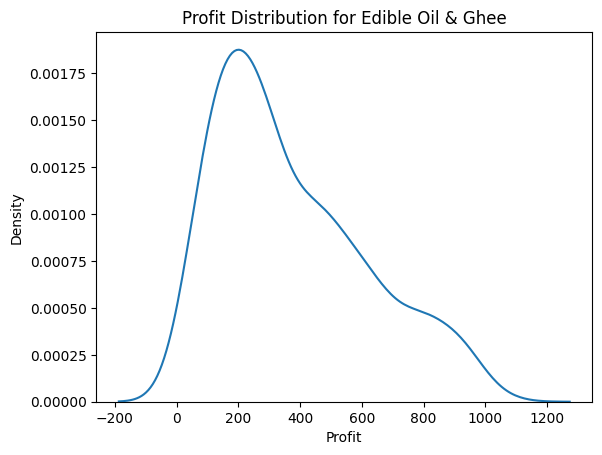

In [28]:
for i in unique_sub_category:
    a = ss.loc[ss["Sub Category"] == i]
    plt.figure()
    sns.kdeplot(data=a, x="Profit", warn_singular=False)
    plt.title(f"Profit Distribution for {i}")
    plt.show()

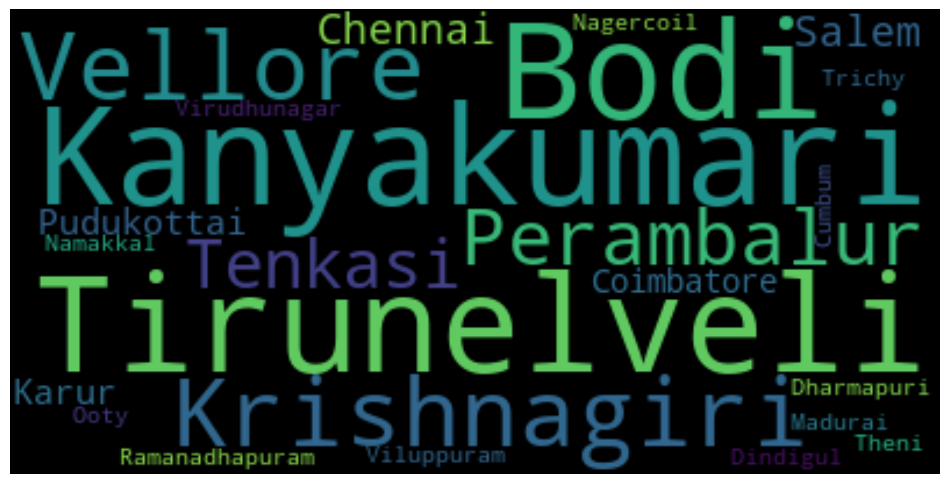

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(12, 12))
stopwords = set(STOPWORDS)
stopwords.add("Order ID")
stopwords.add("Customer Name")
stopwords.add("Category")
stopwords.add("Sub Category")
stopwords.add("Order Date")
stopwords.add("Region")
stopwords.add("Sales")
stopwords.add("Discount")
stopwords.add("Profit")
stopwords.add("State")

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords).generate(" ".join(ss["City"].tolist()))

# Display the word cloud using imshow
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()